In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("Housing.csv")
print(data)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [3]:
price = data['price'].values.reshape(-1,1)

In [4]:
facility_data = data.iloc[:, 1:].to_numpy()
facility_data = np.where(facility_data == 'yes', 1, facility_data)
facility_data = np.where(facility_data == 'no', 0, facility_data)
facility_data = np.where(facility_data == 'furnished', 2, facility_data)
facility_data = np.where(facility_data == 'semi-furnished', 1, facility_data)
facility_data = np.where(facility_data == 'unfurnished', 0, facility_data)

In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(facility_data, price.ravel(), test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

In [7]:
depth = 2
sample_split = 3
rand_state = 42

In [8]:
model = DecisionTreeRegressor(max_depth=depth, min_samples_split=sample_split, random_state=rand_state)

In [9]:
model.fit(X_train_scaled,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,3
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [10]:
param_range = np.arange(1, depth + 1)
train_scores, test_scores = validation_curve(
    model,
    X_train_scaled,
    y_train,
    param_name="max_depth",
    param_range=param_range,
    scoring="r2", # R-squared is a common regression metric
    cv=10 # Number of cross-validation folds
)

In [11]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

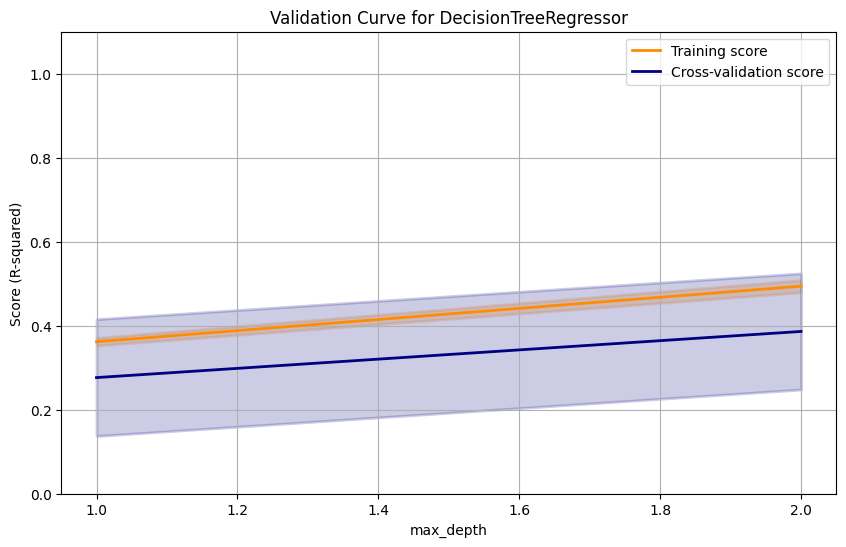

In [12]:
# 5. Plot the validation curve
plt.figure(figsize=(10, 6))
plt.title("Validation Curve for DecisionTreeRegressor")
plt.xlabel("max_depth")
plt.ylabel("Score (R-squared)")
plt.ylim(0.0, 1.1)
lw = 2

# Plot the training score curve
plt.plot(param_range, train_scores_mean, label="Training score", color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)

# Plot the validation score curve
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)

plt.legend(loc="best")
plt.grid(True)
plt.show()

In [13]:
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

In [14]:
pltYPred = []
pltYVal = []
trueChange = []

pltYTestPred = []
pltYTest = []
testChange = []

In [15]:
for i in range(len(y_val_pred)):
  pltYPred.append(y_val_pred[i])
  pltYVal.append(y_val[i])
  trueChange.append(y_val_pred[i] - y_val[i])

In [16]:
for i in range(len(y_test_pred)):
  pltYTestPred.append(y_test_pred[i])
  pltYTest.append(y_test[i])
  testChange.append(y_test_pred[i] - y_test[i])

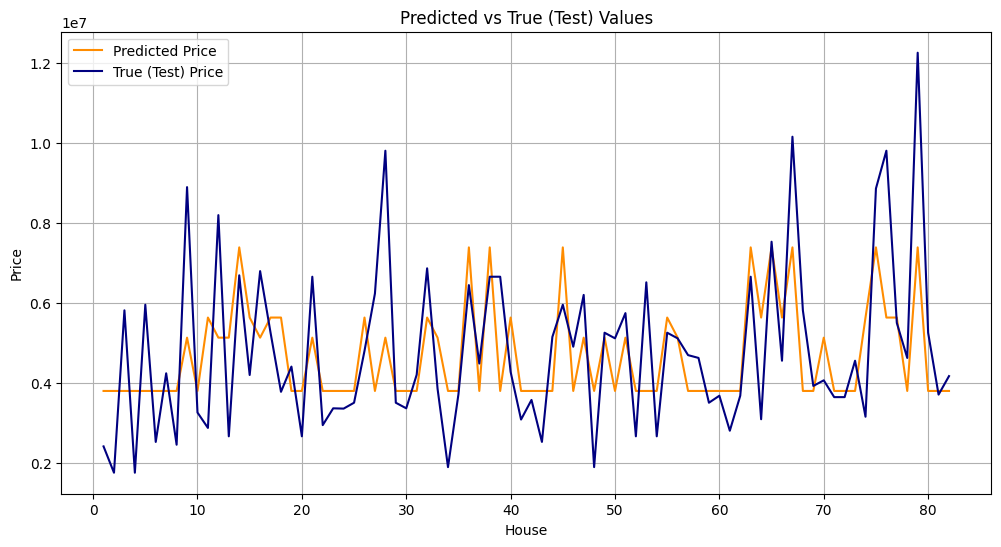

In [17]:
plt.figure(figsize=(12, 6))
plt.title("Predicted vs True (Test) Values")
plt.xlabel("House")
plt.ylabel("Price")
testRange = range(1, len(pltYTestPred)+1)
plt.plot(testRange, pltYTestPred, label="Predicted Price", color="darkorange")

plt.plot(testRange, pltYTest, label="True (Test) Price",
             color="navy")

plt.legend(loc="best")
plt.grid(True)
plt.show()

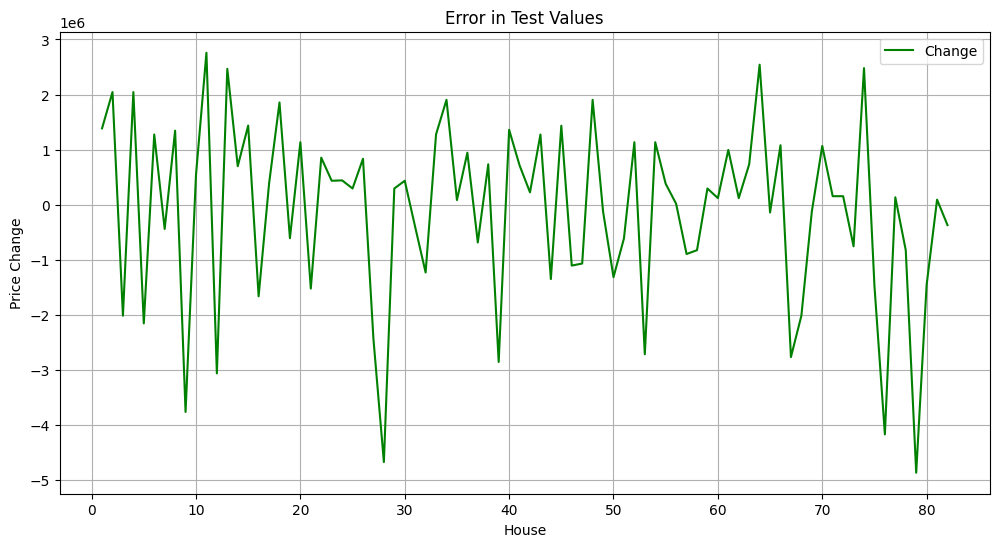

In [18]:
plt.figure(figsize=(12, 6))
plt.title("Error in Test Values")
plt.xlabel("House")
plt.ylabel("Price Change")

plt.plot(testRange, testChange, label="Change",
             color="green")

plt.legend(loc="best")
plt.grid(True)
plt.show()